In [1]:
import pandas as pd
df = pd.read_csv("./datas/vertebral/ok3C.csv")

In [2]:
print(df.shape)
df.head(10)

(310, 8)


,Unnamed: 0,f1,f2,f3,f4,f5,f6,tar
0,0,0.355710,0.519829,0.229193,0.250879,0.307452,0.025163,1
1,1,0.124518,0.296713,0.098622,0.144642,0.476718,0.036359,1
2,2,0.411651,0.513934,0.322982,0.307607,0.386171,0.017528,1
3,3,0.416184,0.557342,0.271255,0.289376,0.341865,0.051839,1
4,4,0.227238,0.289389,0.128155,0.246992,0.409614,0.044181,1
5,5,0.135995,0.365666,0.099517,0.119933,0.647919,0.030936,1
6,6,0.263117,0.400322,0.207356,0.223950,0.542962,0.039688,1
7,7,0.185378,0.309218,0.134598,0.196557,0.507474,0.000885,1
8,8,0.170139,0.358700,0.256757,0.156302,0.590601,0.056681,1
9,9,0.101659,0.206502,0.250134,0.169443,0.152274,0.027281,1


In [3]:
print(df.tar.value_counts())
print(df.tar.value_counts()/len(df))

tar
2    150
0    100
1     60
Name: count, dtype: int64
tar
2    0.483871
0    0.322581
1    0.193548
Name: count, dtype: float64


In [4]:
from sklearn import model_selection
df.to_csv("./datas/cancer/okDatas.csv", index = False)
y = df['tar']
df = df.drop(columns='tar')
X = df
df_minmax_train, df_minmax_test,\
df_train_labels, df_test_labels \
= model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
print(df_train_labels.value_counts()/len(df_train_labels))
print(df_test_labels.value_counts()/len(df_test_labels))

tar
2    0.456221
0    0.350230
1    0.193548
Name: count, dtype: float64
tar
2    0.548387
0    0.258065
1    0.193548
Name: count, dtype: float64


#### 以下是朴素贝叶斯

In [6]:
from models import navieBayes # 调用自己复现的贝叶斯分类器
naviBys = navieBayes.navieBayes() # 调用模型
naviBys.fit(df_minmax_train, df_train_labels)
df_test_pred = naviBys.predict(df_minmax_test)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       1.00      1.00      1.00        18
           2       0.96      1.00      0.98        51

    accuracy                           0.98        93
   macro avg       0.99      0.97      0.98        93
weighted avg       0.98      0.98      0.98        93

[[22  0  2]
 [ 0 18  0]
 [ 0  0 51]]
0.978494623655914


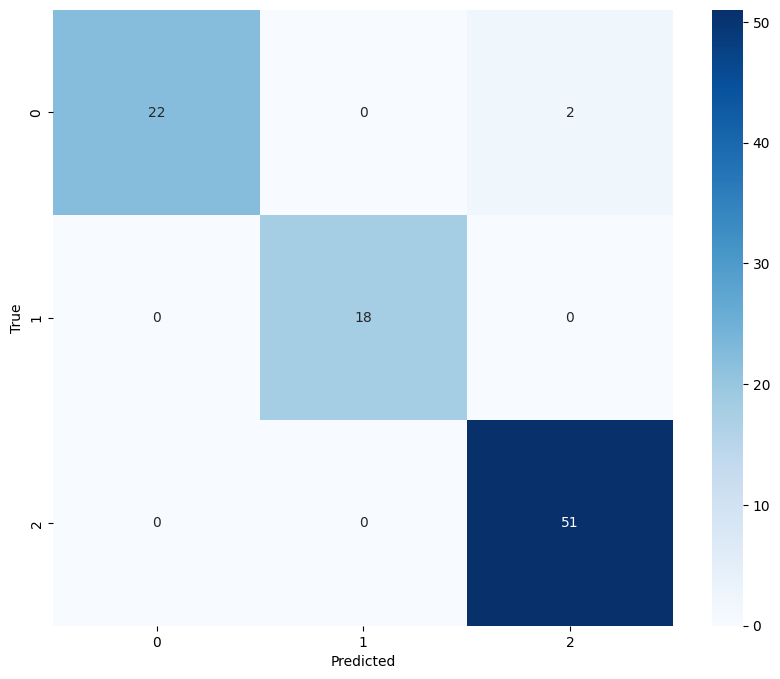

In [7]:
from sklearn import metrics
print(metrics.classification_report(df_test_labels, df_test_pred))
print(metrics.confusion_matrix(df_test_labels, df_test_pred))
print(metrics.accuracy_score(df_test_labels, df_test_pred))
from models import drawCM
drawCM.ConfusionMatrixPlotter(metrics.confusion_matrix(df_test_labels, df_test_pred)).plot()

#### 以下是传统SVM

              precision    recall  f1-score   support

          DH       0.67      0.56      0.61        18
          NO       0.70      0.79      0.75        24
          SL       0.98      0.98      0.98        51

    accuracy                           0.85        93
   macro avg       0.78      0.78      0.78        93
weighted avg       0.85      0.85      0.85        93

[[10  7  1]
 [ 5 19  0]
 [ 0  1 50]]
0.8494623655913979


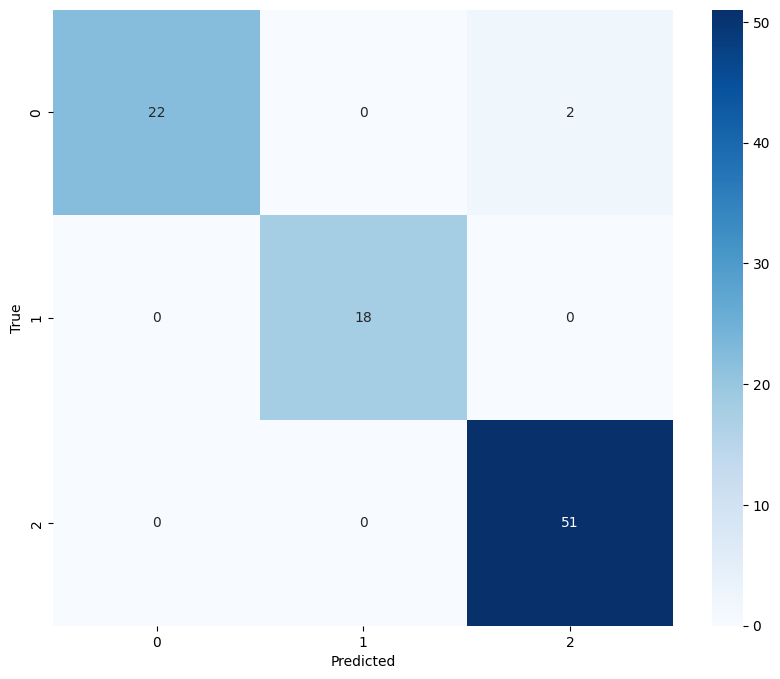

In [8]:
from sklearn import svm
data = pd.read_csv("./datas/vertebral/column_3C.csv")
y = data['tar']
data = data.drop(columns='tar')
X = data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
svc = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
df_test_pred_svm = svc.predict(X_test)
print(metrics.classification_report(y_test, df_test_pred_svm))
print(metrics.confusion_matrix(y_test, df_test_pred_svm))
print(metrics.accuracy_score(y_test, df_test_pred_svm))
from models import drawCM
drawCM.ConfusionMatrixPlotter(metrics.confusion_matrix(df_test_labels, df_test_pred)).plot()